Random Forest Analyse: Studentische Stresslevel-Vorhersage


Daten laden und verstehen


Zuerst laden wir den Datensatz und werfen einen Blick auf die ersten Zeilen, um die verfügbaren Merkmale (Features) und die Zielvariable zu verstehen.

In [6]:
import pandas as pd

df = pd.read_csv('StressLevelDataset.csv', sep=',', header=0, index_col=0)

print("Erste 5 Zeilen des Datensatzes:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Dataset information
print("\nInformationen zum Datensatz:")
print(df.info())


Erste 5 Zeilen des Datensatzes:
| self_esteem   | mental_health_history   | depression   | headache   | blood_pressure   | sleep_quality   | breathing_problem   | noise_level   | living_conditions   | safety   | basic_needs   | academic_performance   | study_load   | teacher_student_relationship   | future_career_concerns   | social_support   | peer_pressure   | extracurricular_activities   | bullying   | stress_level   |
|:--------------|:------------------------|:-------------|:-----------|:-----------------|:----------------|:--------------------|:--------------|:--------------------|:---------|:--------------|:-----------------------|:-------------|:-------------------------------|:-------------------------|:-----------------|:----------------|:-----------------------------|:-----------|:---------------|
| 20            | 0                       | 11           | 2          | 1                | 2               | 4                   | 2             | 3                   | 3        | 

Datenvorbereitung

Wir teilen den Datensatz in Merkmale (X) und die Zielvariable (y) auf. Die Zielvariable ist hier das stress_level. Anschließend spalten wir die Daten in Trainings- und Testsets, um das Modell auf einem Teil der Daten zu trainieren und seine Leistung auf einem ungesehenen Teil zu bewerten.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('stress_level', axis=1)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainings-Set-Größe: {len(X_train)} Proben")
print(f"Test-Set-Größe: {len(X_test)} Proben")

Trainings-Set-Größe: 880 Proben
Test-Set-Größe: 220 Proben


Training des Random Forest Model

Jetzt trainieren wir den RandomForestClassifier. Wir verwenden n_estimators=100, was bedeutet, dass der Algorithmus 100 einzelne Entscheidungsbäume erstellt. Der random_state sorgt dafür, dass die Ergebnisse reproduzierbar sind.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest Classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training Random Forest Model...")
rf.fit(X_train, y_train)
print("Training finished.")

Training Random Forest Model...
Training finished.


Model evaluierung

Nach dem Training bewerten wir die Leistung unseres Modells auf dem Test-Set. Die Genauigkeit (Accuracy) gibt uns einen schnellen Überblick, wie gut das Modell ist. Der Klassifikationsbericht liefert uns detailliertere Metriken wie Präzision, Recall und F1-Score für jede Stresslevel-Klasse.

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Vorhersagen auf dem Test-Set treffen
y_pred = rf.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f"\nGenauigkeit des Modells: {accuracy:.4f}")

# Klassifikationsbericht erstellen
report = classification_report(y_test, y_pred, zero_division=0)
print("\nKlassifikationsbericht:")
print(report)



Genauigkeit des Modells: 0.8773

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.91      0.86      0.89        73
           2       0.86      0.90      0.88        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



Analyse der Feature-Wichtigkeit

Der größte Vorteil des Random Forest ist seine Fähigkeit, die Wichtigkeit der einzelnen Merkmale zu bestimmen. Dies gibt uns Aufschluss darüber, welche Faktoren den größten Einfluss auf die Stresslevel-Vorhersage haben.

Wir extrahieren die Wichtigkeit der Merkmale aus dem trainierten Modell und visualisieren sie.

Top 10 der wichtigsten Merkmale:
|                              | 0         |
|:-----------------------------|:----------|
| blood_pressure               | 0.120697  |
| sleep_quality                | 0.105092  |
| safety                       | 0.0931788 |
| extracurricular_activities   | 0.0775243 |
| bullying                     | 0.0718863 |
| teacher_student_relationship | 0.0667077 |
| depression                   | 0.0593601 |
| social_support               | 0.0575399 |
| future_career_concerns       | 0.0556253 |
| basic_needs                  | 0.0532934 |


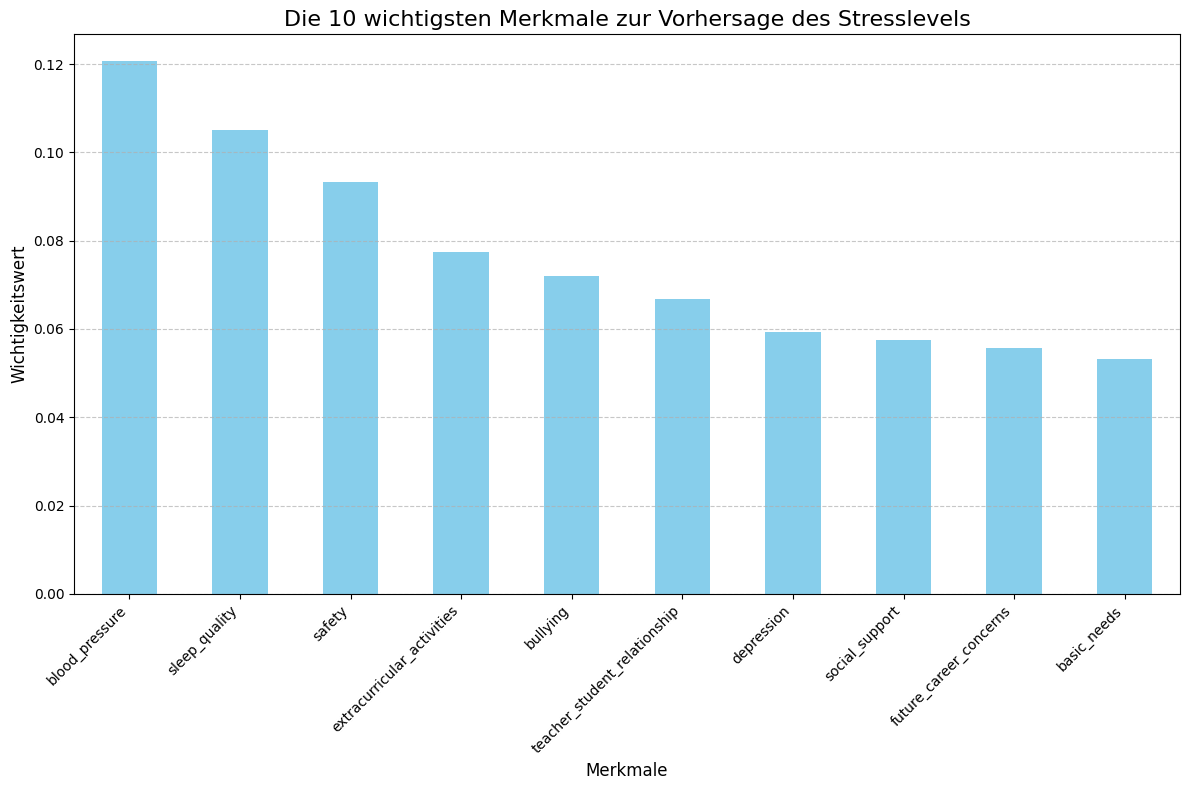

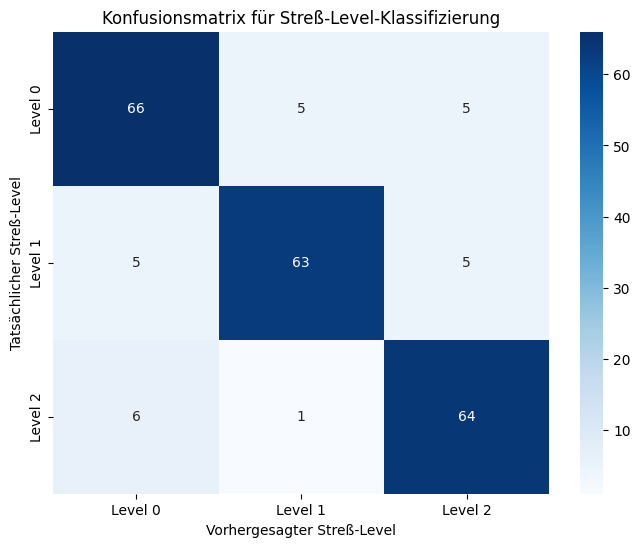

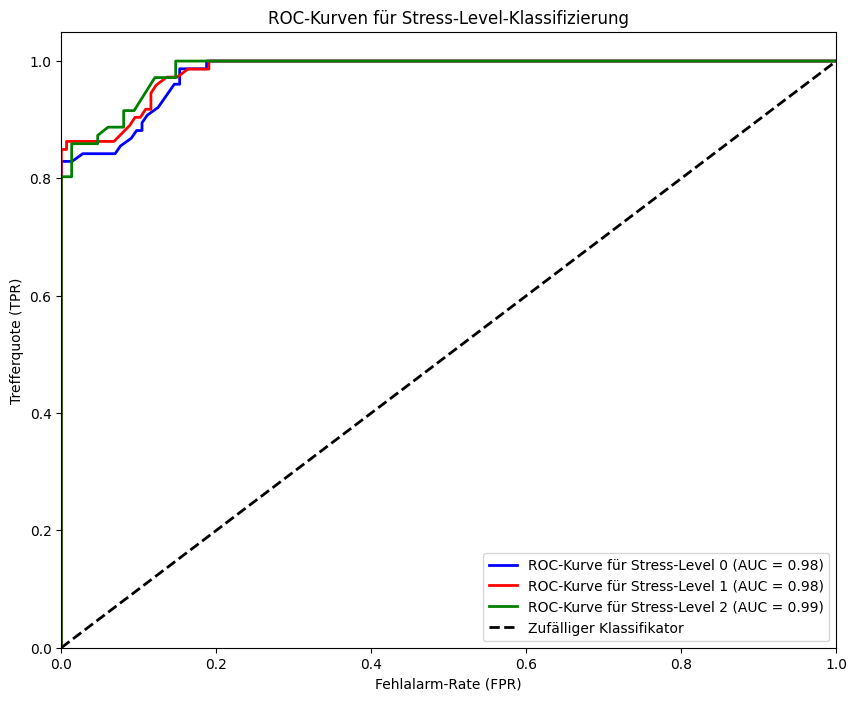

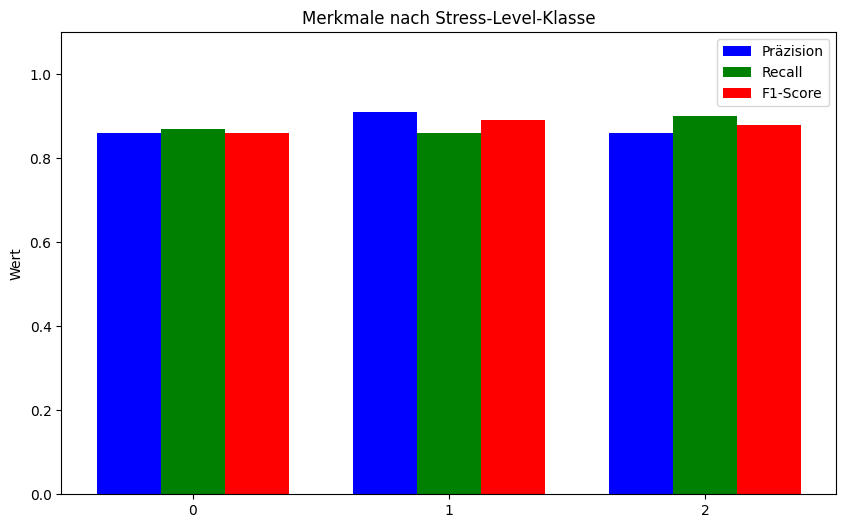

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np


# Feature-Wichtigkeiten extrahieren und in einem Series-Objekt speichern
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Die 10 wichtigsten Merkmale ausgeben
print("Top 10 der wichtigsten Merkmale:")
print(feature_importances.head(10).to_markdown(numalign="left", stralign="left"))

# Visualisierung der wichtigsten Merkmale
plt.figure(figsize=(12, 8))
feature_importances.head(10).plot(kind='bar', color='skyblue')
plt.title('Die 10 wichtigsten Merkmale zur Vorhersage des Stresslevels', fontsize=16)
plt.xlabel('Merkmale', fontsize=12)
plt.ylabel('Wichtigkeitswert', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Labels in ein binäres Format umwandeln (erforderlich für ROC-Kurve bei Mehrklassen)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]
classes = [0, 1, 2]

# Konfusionsmatrix erstellen
cm = confusion_matrix(y_test, y_pred)

# Heatmap der Konfusionsmatrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Level 0', 'Level 1', 'Level 2'],
            yticklabels=['Level 0', 'Level 1', 'Level 2'])
plt.xlabel('Vorhergesagter Streß-Level')
plt.ylabel('Tatsächlicher Streß-Level')
plt.title('Konfusionsmatrix für Streß-Level-Klassifizierung')
plt.show()


# ROC-Werte und AUC für jede Klasse berechnen
y_score = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Jetzt sind y_test_bin und y_score beides NumPy-Arrays, also funktioniert das Schneiden
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC-Kurve zeichnen
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC-Kurve für Stress-Level {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Zufälliger Klassifikator')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Fehlalarm-Rate (FPR)')
plt.ylabel('Trefferquote (TPR)')
plt.title('ROC-Kurven für Stress-Level-Klassifizierung')
plt.legend(loc="lower right")
plt.show()

precision = []
recall = []
f1_score = []

# Daten für Balkendiagramme extrahieren
lines = report.strip().split('\n')
data_lines = lines[2:-3]  # Ignoriert Header und Zusammenfassungszeilen

classes = []
precision = []
recall = []
f1_score = []

for line in data_lines:
    parts = line.split()
    if len(parts) >= 4:
        classes.append(parts[0])
        precision.append(float(parts[1]))
        recall.append(float(parts[2]))
        f1_score.append(float(parts[3]))

# Konvertierung zu numpy arrays für die Diagrammerstellung
classes = np.array(classes)
precision = np.array(precision)
recall = np.array(recall)
f1_score = np.array(f1_score)

n_classes = len(classes)


# Balkendiagramm erstellen
x = np.arange(n_classes)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, precision, width, label='Präzision', color='blue')
rects2 = ax.bar(x, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='red')

# Beschriftungen und Titel hinzufügen
ax.set_ylabel('Wert')
ax.set_title('Merkmale nach Stress-Level-Klasse')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
plt.ylim(0, 1.1)
plt.show()



Die Analyse hat gezeigt, dass der Random Forest mit einer Genauigkeit von über 87% sehr effektiv bei der Vorhersage von Stressleveln ist. Vor allem aber hat er uns gezeigt, dass Merkmale wie blood_pressure und sleep_quality einen deutlich größeren Einfluss auf das Stresslevel haben als andere Faktoren im Datensatz. Dieser Einblick ist entscheidend für das Verständnis der Daten und die Entwicklung gezielter Interventionen.